In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Data Generator
def generate_data(n1=100,n2=100,n3=100,n4=100): #sample numbers for each latent distribution: n1,n2,n3,n4
    # 样本输入特征生成
    mu1 = (0.75, 0.75)
    mu2 = (0.75, 0.25)
    mu3 = (0.25, 0.75)
    mu4 = (0.25, 0.25)
    Sigma1 = np.array([[0.01, 0], [0, 0.01]])
    Sigma4 = Sigma3 = Sigma2 = Sigma1
    
    # np.random.multivariate_normal(mu, sigma, number) 是numpy生成多维正态分布的函数   
    # 第一个参数 mu 各个变量的均值
    # 第二个参数 sigma 各个变量之间的协方差矩阵
    # 第三个参数 number 生成样本的数据个数
    s1 = np.random.multivariate_normal(mu1, Sigma1, n1)
    s2 = np.random.multivariate_normal(mu2, Sigma2, n2)
    s3 = np.random.multivariate_normal(mu3, Sigma3, n3)
    s4 = np.random.multivariate_normal(mu4, Sigma4, n4)

    # s1 = np.clip(s1, 0.5, 1) 将s1中的各个元素的值限定在0.5~1之间
    s1 = np.clip(s1, 0.5, 1)
    s2 = np.clip(s2, [0.5,0], [1,0.499])
    s3 = np.clip(s3, [0,0.5], [0.499,1])
    s4 = np.clip(s4, 0, 0.499)
    # 对生成的数据按第一个维度进行拼接
    data_x = np.concatenate((s1, s2, s3, s4), axis=0)

    # 样本标签生成------------------------对于输入特征满足x1, x2>0.5的样本中有70%的样本标签为1, 30%的标签为0
    data_y = []
    count = 0 
    for x1, x2 in data_x:
        if x1 > 0.5 and x2 > 0.5:
            probability = random.uniform(0, 1) # 生成一个0~1之间的数
            if probability <= 0.8: #0.7 y=1的概率
                data_y += [1]
            else:      #
                data_y += [0]
        elif x1 > 0.5 and x2 <= 0.5:
            probability = random.uniform(0, 1) # 生成一个0~1之间的数
            if probability <= 0.4: #0.7 y=1的概率
                data_y += [1]
            else:      #
                data_y += [0]
        else:
            data_y += [0]

    data_y = np.array(data_y)
    # print(data_y)
    return data_x, data_y

In [3]:
def plot_samples(X, Y):
    flag1 = 0
    flag2 = 0
    for x, y in zip(X, Y):
        if y == 0:
            if flag1 == 0:
                plt.plot(x[0],x[1], 'rx',label='$e = 0$')
                flag1 = 1                         
            plt.plot(x[0],x[1], 'rx')
        elif y == 1:
            if flag2 == 0:
                plt.plot(x[0],x[1], 'b.', label='$e = 1$')
                flag2 = 1
            plt.plot(x[0],x[1], 'b.')
    plt.legend(loc='upper left') #label='$e = 0$', label='$e = 1$'

In [4]:
# Wholesame data
def wholesame_data():
    # 设定最大最小值，附加一点点边缘填充
    x1_min, x1_max = 0, 1.02
    x2_min, x2_max = 0, 1.02
    h = 0.02
    
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    X = np.c_[x1.ravel(), x2.ravel()]
    
    # 样本标签生成------------------------对于输入特征满足x1, x2>0.5的样本中有70%的样本标签为1, 30%的标签为0
    data_y = []
    count = 0 
    for x in X:
        if x[0] > 0.5 and x[1] > 0.5:
            probability = random.uniform(0, 1) # 生成一个0~1之间的数
            if probability <= 0.8: #0.7 y=1的概率
                data_y += [1]
            else:      #
                data_y += [0]
        elif x[0] > 0.5 and x[1] <= 0.5:
            probability = random.uniform(0, 1) # 生成一个0~1之间的数
            if probability <= 0.4: #0.7 y=1的概率
                data_y += [1]
            else:      #
                data_y += [0]
        else:
            data_y += [0]

    data_y = np.array(data_y)
    # print(data_y)
    return X, data_y

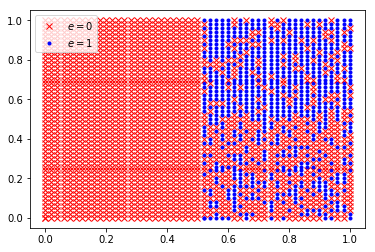

In [32]:
X, Y = wholesame_data()
plot_samples(X, Y)

In [6]:
train_x, train_y = generate_data(n1=1000,n2=1000,n3=1000,n4=1000)
test_x, test_y = generate_data(n1=1000,n2=1000,n3=1000,n4=1000)
print(train_x, train_y)

[[0.66240003 0.94415387]
 [0.65181004 0.54471205]
 [0.7082571  0.66862346]
 ...
 [0.2442169  0.23336755]
 [0.10307159 0.13537163]
 [0.1616655  0.28799967]] [1 0 0 ... 0 0 0]


In [7]:
# 载入相关的包
import torch
import torch.utils.data as tud

# 定义获得模型的函数
## input_dim=2双模态模型
## input_dim=1单模态模型

In [8]:
# 定义一个def_model函数， 输入参数input_dim，如果input_dim=2，那么输入特征是双模态，即2维的
# 如果input_dim=1那么输入特征是单模态的，维度为1
# 输入参数H表示隐层神经元个数
def get_model(input_dim, H):
    # 使用torch.nn.Sequential搭建网络
    model = torch.nn.Sequential(
        torch.nn.Linear(input_dim, H),
        torch.nn.ReLU(),
        #torch.nn.Linear(H, H),
        #torch.nn.ReLU(),
        # 准备以交叉熵为损失函数， 
        torch.nn.Linear(H, 2),
        #torch.nn.Sigmoid()
    )
    # 对两个线性层的参数进行初始化，时期符合正态分布
    torch.nn.init.normal_(model[0].weight)
    torch.nn.init.normal_(model[2].weight)
    
    return model

In [33]:
train_x = torch.Tensor(train_x)
train_y = torch.LongTensor(train_y)
test_x = torch.Tensor(test_x)
test_y = torch.LongTensor(test_y)
X = torch.Tensor(X)
Y = torch.LongTensor(Y)

# 构建双模态模型和单模态模型的dataset和dataloader

In [10]:
# 双模态测试
# 先准备双模态的数据集， 直接使用data即可
class dataset_double(tud.Dataset):
    def __init__(self, data_x, data_y):
        super(dataset_double, self).__init__()
        self.data_x = data_x
        self.data_y = data_y
    def __len__(self):
        return len(self.data_x)
    
    def __getitem__(self, idx):
        return self.data_x[idx], self.data_y[idx]


dataset_double = dataset_double(train_x, train_y)
dataloader_double = tud.DataLoader(dataset_double, batch_size=20, shuffle=True, num_workers=0)


# 单模态数据集以及单模态数据集的dataLoader
class dataset_single(tud.Dataset): # Channel i
    def __init__(self, data_x, data_y, i=1):
        super(dataset_single, self).__init__()
        self.data_x = data_x
        self.data_y = data_y
        self.i = i
    def __len__(self):
        return len(self.data_x)
    
    def __getitem__(self, idx):
        return self.data_x[idx, self.i-1:self.i], self.data_y[idx]


dataset_c1 = dataset_single(train_x, train_y, 1)
dataset_c2 = dataset_single(train_x, train_y, 1)
dataloader_c1 = tud.DataLoader(dataset_c1, batch_size=20, shuffle=True, num_workers=0)
dataloader_c2 = tud.DataLoader(dataset_c2, batch_size=20, shuffle=True, num_workers=0)


def view_dataloader(dataloader):
    for i, (x, y) in enumerate(dataloader):
        if i>=5:
            break
        print(i, x, y)
        print(x.shape)
        
# view_dataloader(dataloader_single)     
# view_dataloader(dataloader_double)

#### data_x[:20, 0] 不算张量切片， 结果的shape为[20]， 算是访问
#### data_x[:20, 0:1] 才是张量切片操作， 结果的shape为[20, 1]

# 设定迭代轮次， 损失函数

In [11]:
# 设定超参数NUM_EPOCHS，即训练轮次
NUM_EPOCHS = 501
# 搭建双模态模型和单模态模型，二者使用相同的损失函数和优化器
model_double = get_model(input_dim=2, H=100)
model_c1 = get_model(input_dim=1, H=100)
model_c2 = get_model(input_dim=1, H=100)
loss_fn = torch.nn.CrossEntropyLoss() # BCELoss() #

epoch_count_double = 0
epoch_count_single = 0

# 定义模型评估函数

In [12]:
# 传入参数model 要评估的模型， 传入要评估的数据
def evaluate(model, evaluate_x, evaluate_y):
    # 使用传入的模型进行预测
    model_pred = model(evaluate_x)

    # 将模型决策结果与评估的标签进行比对
    # 样本标签为0的样本总数
    hit_zero =0
    all_zero = len([count for count in evaluate_y if count == 0])
    # 样本标签为1的样本总数
    hit_one = 0
    all_one = len([count for count in evaluate_y if count == 1])
    
    num_sample = len(evaluate_y)
    
    hit = 0
    for i in range(len(evaluate_x)):
         # 模型根据预测数据进行决策
        model_decision = torch.argmax(model_pred[i])
        if model_decision == evaluate_y[i] == 0:
            hit_zero += 1
        if model_decision == evaluate_y[i] == 1:
            hit_one += 1
        if model_decision == evaluate_y[i]:
            hit += 1
    return hit_zero / all_zero, hit_one / all_one, hit / num_sample

# 配置优化器并训练双模态模型

In [13]:
# 配置优化器使得其优化model_double的参数
optimizer = torch.optim.Adam(model_double.parameters(), lr = 1e-3)
# 双模态模型训练
# 每一个迭代轮次， 都会将dataset中的数据全都拿出来训练一遍
for epoch in range(NUM_EPOCHS):
    for i, (x, y) in enumerate(dataloader_double):
        # 使用模型进行预测
        y_pred = model_double(x)
        #print(y_pred)
        #print(y)
        # 计算loss——fn
        loss = loss_fn(y_pred, y) #.float()
        # print(loss.item())
        # 清除梯度
        optimizer.zero_grad()
        # 根据loss计算梯度并放在计算图内
        loss.backward()
        # 使用优化器根据计算图内的梯度进行参数优化
        optimizer.step()
    #epoch_count_double += 1
    loss = loss_fn(model_double(train_x), train_y).item() #.float()
    acc = evaluate(model_double, test_x, test_y) 
    #acc = evaluate(model_double, X, Y)
    if epoch%100 == 0:
        print('Epoch:', epoch, 'Loss:', loss, 'rate_zero:', acc[0], 'rate_one:', acc[1],  'Accuracy:', acc[2]) #

Epoch: 0 Loss: 0.3495635688304901 rate_zero: 0.9206181945907973 rate_one: 0.5836947094535994 Accuracy: 0.8235
Epoch: 100 Loss: 0.29828765988349915 rate_zero: 0.9174569722514928 rate_one: 0.6834345186470078 Accuracy: 0.85
Epoch: 200 Loss: 0.2943563163280487 rate_zero: 0.9142957499121883 rate_one: 0.6947094535993061 Accuracy: 0.851
Epoch: 300 Loss: 0.2945515215396881 rate_zero: 0.9107832806462943 rate_one: 0.6990459670424979 Accuracy: 0.84975
Epoch: 400 Loss: 0.293673038482666 rate_zero: 0.91324200913242 rate_one: 0.6973113616652211 Accuracy: 0.851
Epoch: 500 Loss: 0.2940046191215515 rate_zero: 0.9125395152792413 rate_one: 0.6990459670424979 Accuracy: 0.851


# 配置优化器并训练单模态模型

In [14]:
# 配置优化器使得其优化model_c1的参数
optimizer = torch.optim.Adam(model_c1.parameters(), lr = 1e-3)
# 单模态模型训练
for epoch in range(NUM_EPOCHS):
    for i, (x, y) in enumerate(dataloader_c1):
        # 使用模型进行预测
        y_pred = model_c1(x)
        # 计算loss——fn
        loss = loss_fn(y_pred, y) #.float()
        # print(loss.item())
        # 清除梯度
        optimizer.zero_grad()
        # 根据loss计算梯度并放在计算图内
        loss.backward()
        # 使用优化器根据计算图内的梯度进行参数优化
        optimizer.step()
    loss = loss_fn(model_c1(train_x[:, 0:1]), train_y).item() #.float()
    acc = evaluate(model_c1, test_x[:, 0:1], test_y) 
    #acc = evaluate(model_c1, X[:, 0:1], Y)
    if epoch%100 == 0:
        print('Epoch:', epoch, 'Loss:', loss, 'rate_zero:', acc[0], 'rate_one:', acc[1],  'Accuracy:', acc[2])

Epoch: 0 Loss: 0.37069937586784363 rate_zero: 0.8180540920266948 rate_one: 0.6097137901127494 Accuracy: 0.758
Epoch: 100 Loss: 0.33861643075942993 rate_zero: 0.7077625570776256 rate_one: 0.997398091934085 Accuracy: 0.79125
Epoch: 200 Loss: 0.3448406755924225 rate_zero: 0.7070600632244468 rate_one: 0.9982653946227233 Accuracy: 0.791
Epoch: 300 Loss: 0.33710649609565735 rate_zero: 0.7070600632244468 rate_one: 0.9982653946227233 Accuracy: 0.791
Epoch: 400 Loss: 0.33678168058395386 rate_zero: 0.7070600632244468 rate_one: 0.997398091934085 Accuracy: 0.79075
Epoch: 500 Loss: 0.337007075548172 rate_zero: 0.7070600632244468 rate_one: 0.997398091934085 Accuracy: 0.79075


In [15]:
# 配置优化器使得其优化model_c2的参数
optimizer = torch.optim.Adam(model_c2.parameters(), lr = 1e-3)
# 单模态模型训练
for epoch in range(NUM_EPOCHS):
    for i, (x, y) in enumerate(dataloader_c2):
        # 使用模型进行预测
        y_pred = model_c2(x)
        # 计算loss——fn
        loss = loss_fn(y_pred, y) #.float()
        # print(loss.item())
        # 清除梯度
        optimizer.zero_grad()
        # 根据loss计算梯度并放在计算图内
        loss.backward()
        # 使用优化器根据计算图内的梯度进行参数优化
        optimizer.step()
    loss = loss_fn(model_c2(train_x[:, 1:2]), train_y).item() #.float()
    acc = evaluate(model_c2, test_x[:, 1:2], test_y) 
    #acc = evaluate(model_c2, X[:, 1:2], Y)
    if epoch%100 == 0:
        print('Epoch:', epoch, 'Loss:', loss, 'rate_zero:', acc[0], 'rate_one:', acc[1],  'Accuracy:', acc[2])

Epoch: 0 Loss: 0.6001024842262268 rate_zero: 1.0 rate_one: 0.0 Accuracy: 0.71175
Epoch: 100 Loss: 2.3020637035369873 rate_zero: 0.5749912188268352 rate_one: 0.6669557675628794 Accuracy: 0.6015
Epoch: 200 Loss: 3.3164448738098145 rate_zero: 0.5746399719002458 rate_one: 0.6686903729401561 Accuracy: 0.60175
Epoch: 300 Loss: 4.239354133605957 rate_zero: 0.5742887249736565 rate_one: 0.6695576756287944 Accuracy: 0.60175
Epoch: 400 Loss: 5.280195713043213 rate_zero: 0.5746399719002458 rate_one: 0.6678230702515178 Accuracy: 0.6015
Epoch: 500 Loss: 6.112246036529541 rate_zero: 0.8605549701440113 rate_one: 0.22810060711188204 Accuracy: 0.67825


# 模型评估： 评估指标
##  rate_zero: 模型预测标签为0样本的命中率
##  rate_one: 模型预测标签为1样本的命中率
##  hit_rate: 模型预测总正确率

In [35]:
#rate_zero, rate_one, hit_rate = evaluate(model_c1, test_x[:, 0:1], test_y)
rate_zero, rate_one, hit_rate = evaluate(model_c1, X[:, 0:1], Y)
print(rate_zero, rate_one, hit_rate)

0.7202607278652906 1.0 0.8019992310649751


In [36]:
#rate_zero, rate_one, hit_rate = evaluate(model_c2, test_x[:, 1:2], test_y)
rate_zero, rate_one, hit_rate = evaluate(model_c2, X[:, 1:2], Y)
print(rate_zero, rate_one, hit_rate)

0.7664312873438349 0.3736842105263158 0.6516724336793541


In [37]:
# 双模态模型评估
#rate_zero, rate_one, hit_rate = evaluate(model_double, test_x, test_y)
rate_zero, rate_one, hit_rate = evaluate(model_double, X, Y)
print(rate_zero, rate_one, hit_rate)

0.8853883758826725 0.7276315789473684 0.8392925797770089


# Decision Boundary

In [19]:
def plot_decision_boundary(pred_func, channel=3):
 
    # 设定最大最小值，附加一点点边缘填充
    x1_min, x1_max = 0, 1.01
    x2_min, x2_max = 0, 1.01
    h = 0.01

    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    
    if channel == 3:
        X = torch.Tensor(np.c_[x1.ravel(), x2.ravel()])
    elif channel == 1:
        X = torch.Tensor(np.c_[np.arange(x1_min, x1_max, h)])
    elif channel == 2:
        X = torch.Tensor(np.c_[np.arange(x2_min, x2_max, h)])
 
    # 用预测函数预测一下 model_pred = model(evaluate_x)
    Z = pred_func(X)
    Z = torch.argmax(Z, dim=1)
    if channel == 3:
        Z = Z.reshape(x1.shape)
    elif channel == 1:
        Z = torch.Tensor(np.vstack([Z]*x1.shape[0]))
    elif channel == 2:
        # TBD
        Z = torch.Tensor(np.dstack([Z]*x2.shape[0]))[0]
 
    # 然后画出图
    plt.contourf(x1, x2, Z, cmap=plt.cm.Spectral)
    plt.ylabel('$c_2$')
    plt.xlabel('$c_1$')
    #plt.title("Decision Boundary")
    #plt.scatter(x1, x2, c=Z, cmap=plt.cm.Spectral)

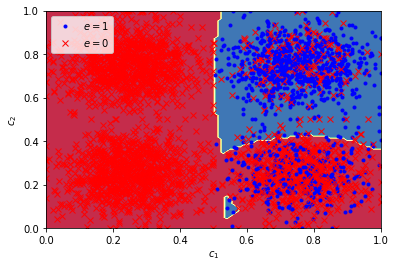

In [20]:
#plt.plot([0.5,0.5,1], [1,0.5,0.5], 'k', linestyle='dashed')
plot_samples(train_x, train_y)
plot_decision_boundary(model_double)

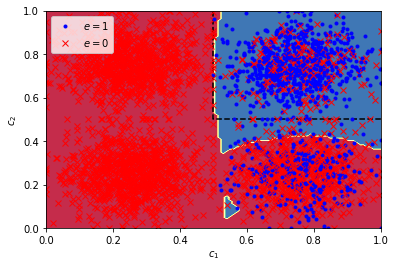

In [21]:
plt.plot([0.5,0.5,1], [1,0.5,0.5], 'k', linestyle='dashed')
plot_samples(test_x, test_y)
plot_decision_boundary(model_double)

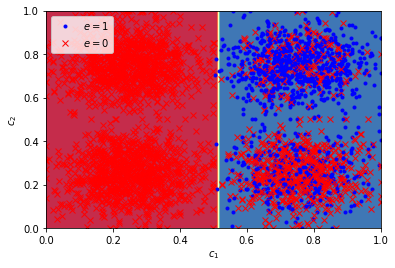

In [22]:
plot_samples(train_x, train_y)
plot_decision_boundary(model_c1,1)

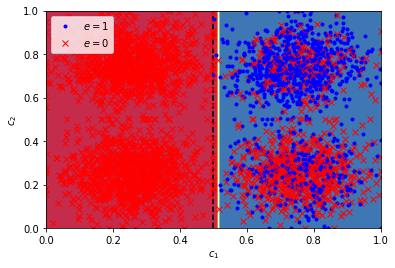

In [23]:
plt.plot([0.5,0.5], [0,1], 'k', linestyle='dashed')
plot_samples(test_x, test_y)
plot_decision_boundary(model_c1,1)

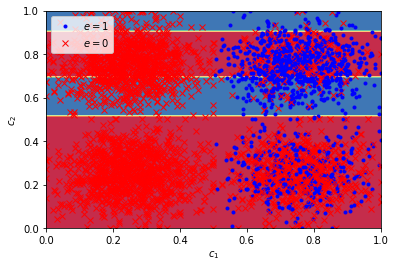

In [24]:
plot_samples(train_x, train_y)
plot_decision_boundary(model_c2,2)

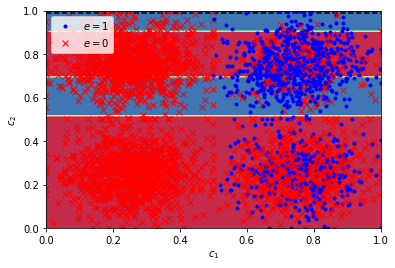

In [25]:
plt.plot([0,1], [0.99,0.99], 'k', linestyle='dashed')
plot_samples(test_x, test_y)
plot_decision_boundary(model_c2,2)

In [26]:
#plot_decision_boundary(model_c2,2)

# Debug Code

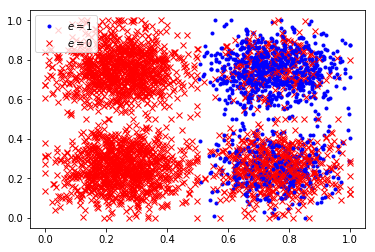

In [27]:
plot_samples(train_x, train_y)

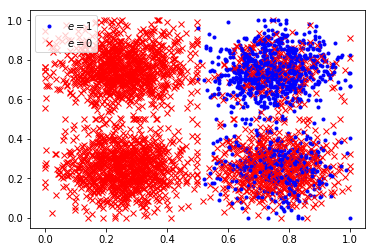

In [28]:
plot_samples(test_x, test_y)

Text(0.5, 1.0, 'Decision Boundary')

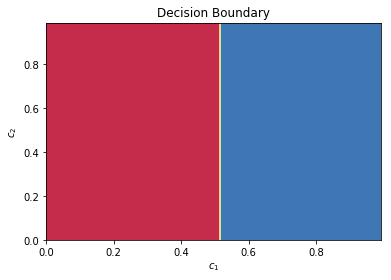

In [29]:
channel = 1
x1_min, x1_max = 0, 1
x2_min, x2_max = 0, 1
h = 0.01

x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

if channel == 3:
    X = torch.Tensor(np.c_[x1.ravel(), x2.ravel()])
elif channel == 1:
    X = torch.Tensor(np.c_[np.arange(x1_min, x1_max, h)])
elif channel == 2:
    X = torch.Tensor(np.c_[np.arange(x2_min, x2_max, h)])

# 用预测函数预测一下 model_pred = model(evaluate_x)
Z = model_c1(X)
Z = torch.argmax(Z, dim=1)
Z = torch.Tensor(np.vstack([Z]*x1.shape[0])) #Z.reshape()

# 然后画出图
plt.contourf(x1, x2, Z, cmap=plt.cm.Spectral)
plt.ylabel('$c_2$')
plt.xlabel('$c_1$')
plt.title("Decision Boundary")
#plt.scatter(x1, x2, c=Z, cmap=plt.cm.Spectral) #